In [1]:
import os
print(os.getcwd())

D:\python\巨匠第四階段\20191207-day1-capstone


In [2]:
#!pip install scikit-image seaborn
#!pip install keras-radam

In [2]:
# HomeWork
# 如何去讀取所有的訓練資料 (c,v) 一組

# y
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage import color, io
y = pd.read_csv('./train_labels.csv')
y[:3]  #前三項

,id,appliance
0,1000,4
1,1001,9
2,1002,4


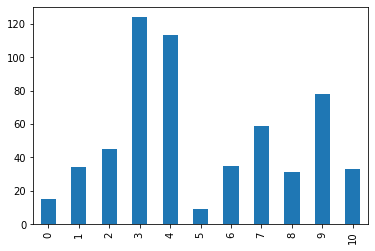

In [3]:
#aplt.title('Data Distribution')
#y.appliance.value_counts().sort_index().plot(kind='bar')
y.appliance.value_counts().sort_index().plot(kind = "bar")   #value_counts() ,sort_index() 
plt.show()

In [5]:
#y[y.id==1000].appliance.values[0]
y[y.id==1000].appliance.values[0] #index 1 is out of bounds for axis 0 with size 1

4

In [21]:
# 分析檔案名稱
filename = './train/1000_c.png'
#filename.split("/")[-1].split(".")[-2].split("_")[-2]
filename.split('/')[-1].split('.')[0].split('_')[0]

#print(filename.endswith('c.png'))

'1000'

In [7]:
# X 讀取 all training data (image)
# os.walk 從作業系統中每讀取一筆檔案名稱 進行影像讀取 加上 標籤對應

image_c = [] # 每一的檔案的影像 電流訊號轉的影像
image_v = [] # 每一的檔案的影像 電壓訊號轉的影像
data = [] # 每一的檔案對應appliance 數字

import os
for root, dirs, files in os.walk("./data/train/", topdown=False):
    for filename in files:
        if os.path.join(root, filename).endswith('c.png'):
            data.append((y[y.id==int(  filename.split('_')[0] )].appliance.values[0]) )
            file = os.path.join(root, filename)
            image_c.append(io.imread(file, as_gray=True))
        
          

In [8]:
len(image_c), len(data)

(576, 576)

In [9]:
# 準備 X_train , y_train 
# data standardization
from keras.utils import to_categorical
X_train, y_train = np.array(image_c).astype(np.float32)/255.0, np.array(data)
y_train_oh = to_categorical(y_train)
X_train.shape, y_train.shape, y_train_oh.shape

y_train_oh[0]

Using TensorFlow backend.


array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [10]:
# Build model
from keras import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras_radam import RAdam

model = Sequential()
model.add( Dense( units=1024, activation='relu', input_shape=(128*176,) ) )
model.add( Dense( units=512, activation='relu' ) )
model.add( Dense( units=11, activation='softmax' ) )
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1024)              23069696  
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_3 (Dense)              (None, 11)                5643      
Total params: 23,600,139
Trainable params: 23,600,139
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train.reshape(576, 128*176), y_train_oh, batch_size=5, validation_split=0.1, verbose=1, epochs=50)

Train on 518 samples, validate on 58 samples
Epoch 1/50
518/518 [==============================] - 2s 4ms/step - loss: 1.8260 - accuracy: 0.3919 - val_loss: 1.7451 - val_accuracy: 0.4655
Epoch 2/50
518/518 [==============================] - 2s 3ms/step - loss: 1.2397 - accuracy: 0.5579 - val_loss: 1.3381 - val_accuracy: 0.5345oss: 1.2399 - accuracy: 0.
Epoch 3/50
518/518 [==============================] - 2s 3ms/step - loss: 1.0697 - accuracy: 0.6178 - val_loss: 1.1424 - val_accuracy: 0.6379
Epoch 4/50
518/518 [==============================] - 2s 3ms/step - loss: 0.9550 - accuracy: 0.6602 - val_loss: 1.0910 - val_accuracy: 0.6207
Epoch 5/50
518/518 [==============================] - 2s 3ms/step - loss: 0.8438 - accuracy: 0.7027 - val_loss: 1.2210 - val_accuracy: 0.5862
Epoch 6/50
518/518 [==============================] - 2s 3ms/step - loss: 0.8095 - accuracy: 0.6969 - val_loss: 0.8750 - val_accuracy: 0.6897
Epoch 7/50
518/518 [==============================] - 2s 3ms/step - loss: 0.6

In [12]:
# 看精準度
model.evaluate(X_train.reshape(576, 128*176), y_train_oh)[1]
# 0.9565972089767456
# 0.9635416865348816
# 0.9739583134651184

576/576 [==============================] - 0s 126us/step


0.9739583134651184

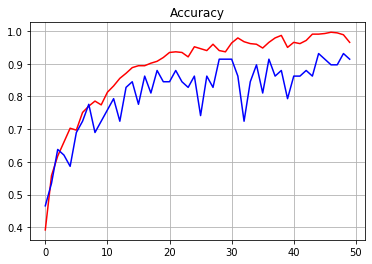

In [13]:
plt.plot(history.history['accuracy'], color='red')
plt.plot(history.history['val_accuracy'], color='blue')
plt.title('Accuracy')
plt.grid()
plt.show()

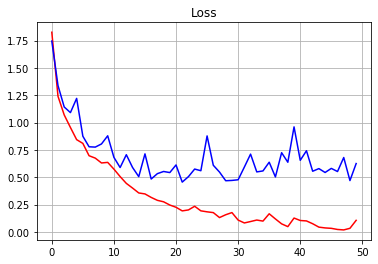

In [14]:
plt.plot(history.history['loss'], color='red')
plt.plot(history.history['val_loss'], color='blue')
plt.title('Loss')
plt.grid()
plt.show()

In [15]:
# prediction
y_pred= np.argmax(model.predict(X_train.reshape(576, 128*176)), axis=1)
y_pred[:10]
y_train[:10]

array([4, 9, 4, 9, 6, 3, 3, 4, 8, 3], dtype=int64)

Text(78.308, 0.5, 'True value')

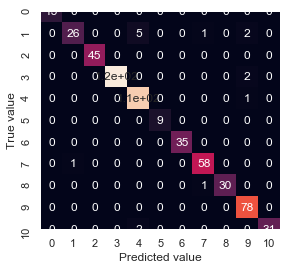

In [16]:
import seaborn as sns; sns.set() # plot formatting
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_train, y_pred)
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('Predicted value')
plt.ylabel('True value')

In [17]:
# 進行比賽讀入test數據 並且匯出


# X 讀取 all training data (image)
# os.walk 從作業系統中每讀取一筆檔案名稱 進行影像讀取 加上 標籤對應

image_test_c = [] # 每一的檔案的影像 電流訊號轉的影像
image_test_v = [] # 每一的檔案的影像 電壓訊號轉的影像
data_test    = [] # 每一的檔案對應appliance 數字

import os
for root, dirs, files in os.walk("./data/test/", topdown=False):
    for filename in files:
        if os.path.join(root, filename).endswith('c.png'):
            data_test.append( filename.split('_')[0] )
            file = os.path.join(root, filename)
            image_test_c.append(io.imread(file, as_gray=True))

In [18]:
X_test = np.array(image_test_c).astype(np.float32)/255.0
X_test.shape

(384, 128, 176)

In [19]:
# 預測
y_test_pred = np.argmax(model.predict(X_test.reshape(384, 128*176)), axis=1)
y_test_pred

array([ 9,  5,  4,  2,  8,  6,  7,  4,  4,  4,  2,  9,  3,  3,  7,  3,  9,
        8, 10,  4,  9,  2,  3,  3,  8,  1,  0, 10,  3,  6, 10,  4,  9,  4,
        3,  4,  7,  0,  9,  4,  3,  9,  3,  3,  7,  8,  3,  2,  4,  4,  7,
        4,  4,  4,  4,  4,  3,  5,  1,  3,  3,  4,  4,  3,  4,  6,  9,  3,
        8,  6,  3,  2,  7,  3,  9,  2,  4,  4, 10,  8,  6,  4,  1,  7,  3,
        2,  4,  3,  7,  8,  3,  6,  7,  3,  4,  9,  8,  7, 10,  1,  4,  3,
        7,  2,  9,  2,  3,  4,  4,  8, 10,  6,  3,  9,  4,  1,  4,  4,  9,
        9,  4,  6, 10,  4,  3, 10,  8,  2,  4,  7,  5, 10,  7, 10,  3,  9,
        1,  0,  2,  4,  3,  1,  7,  8,  8,  3,  2,  4,  9,  4,  4,  7,  4,
        9,  9,  4, 10,  7,  0,  7, 10,  9,  3,  6,  1,  4, 10,  7,  1,  3,
        2,  4,  4,  7,  4,  9,  3,  3,  1,  4,  9,  0, 10,  2, 10,  8,  3,
        4,  6,  9,  9,  9,  2,  3, 10,  4,  4, 10,  9,  5,  3,  9,  3,  8,
        8,  7,  3,  7,  7,  2,  4,  8,  3,  8,  7,  4,  7,  4,  4,  2,  3,
        9,  3, 10,  4,  9

In [20]:
# 彙總輸出
submission = pd.DataFrame(data_test, columns=['id'])
submission['appliance'] = y_test_pred
submission.to_csv('./submission.20191207.003.csv', index=False)